# Discrete Probability Distributions
Ref: https://www.countbayesie.com/blog/2015/3/17/interrogating-probability-distributions

Equation to obtain the discrete probability (dp) of having n values in k attempts

$dp$ $=$ $\binom{n}{k}$ $p^k(1-p)^{n-k}$

In [1]:
import math
import scipy

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from scipy import integrate
from scipy.stats import beta

Probability of having 10 tails is 0.028


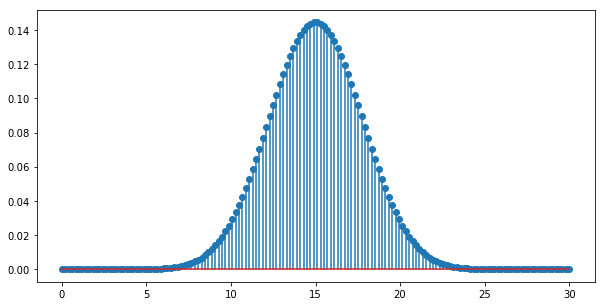

In [2]:
def scipyFactorial(k, n):
    return scipy.special.binom(k, n)

def probabilityMassFunction(n, k, p):
    heads = scipyFactorial(k,n)
    tails = math.pow(p, n) * math.pow(1-p, k-n)
    return heads * tails

n=10
k=30
p=0.5
print("Probability of having {} tails is {:0.3f}".format(n, probabilityMassFunction(n,k,p)))

# x = [i for i in range(k)]
x = np.linspace(0, k, 30*5)
y = [probabilityMassFunction(i,k,p) for i in x]

plt.figure(figsize=(10,5))
plt.stem(x, y, use_line_collection=True)
plt.show()

In [3]:
first = 18
last = 25

def probabilityMassFunctionRange(first, last, k, p):
    values = [x for x in range(first,last, 1)]
    total = 0
    for i in values:
        total += probabilityMassFunction(i,k,p)
    return total

print("Probability of having between {} and {} tails (inclusive) is {:0.3f}".format(first, last, probabilityMassFunctionRange(first, last, k, p)))

Probability of having between 18 and 25 tails (inclusive) is 0.181


# Beta

$Beta$($\alpha$,$\beta$) = $\frac{x^{\alpha - 1}(1-x)^{\beta -1}}{B(\alpha ,\beta)}$

mean: 0.36666666666666664, variance: 0.007491039426523298, skew: 0.19256515705838026, kurt: -0.12788168769030014


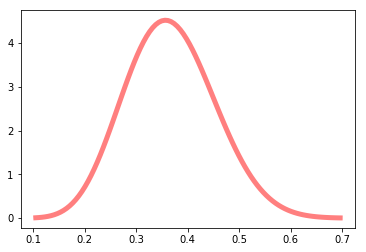

In [18]:
a, b = 11, 19
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
print("mean: {}, variance: {}, skew: {}, kurt: {}".format(mean, var, skew, kurt))

x = np.linspace(beta.ppf(0.0001, a, b),
                beta.ppf(0.9999, a, b), 100)

plt.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.5, label='beta pdf')

## "What is the probability that ppp is between 0.2 and 0.5?"

In [15]:
minimum = 0.2
maximum = 0.5

ii = integrate.quad(beta.pdf, minimum, maximum, args=((a, b)))

print("What is the probability that p is between {} and {}?: {:0.3f}".format(minimum, maximum, ii[0]))

What is the probability that p is between 0.2 and 0.5?: 0.912


# Logistic Regression from Bayes' Theorem

Reference: https://www.countbayesie.com/blog/2019/6/12/logistic-regression-from-bayes-theorem

Calculate the odds between two hypothesis

O(H|D) = $\frac{P(D|H)}{P(D|\bar{H})}O(H)$

But this is not good to fit into a linear equation:

y = $\beta x+ \beta_0$


For this, we can use the Log function

$ln(O(H|D))$ = $ln(\frac{P(D|H)}{P(D|\bar{H})}O(H))$ = $ln(\frac{P(D|H)}{P(D|\bar{H})}) + ln(O(H))$

What we need is really just that:

$\beta_0 = ln(O(H))$

Or that $\beta_0$ is the log of the prior odds. 

To make it fit with what we need:

$lo(H|D) = \beta D + \beta_0$

but because 1/0 is undefined, and ln(0) is also undefined, we need to modify the equation to handle these values on the right side

$P(H|D) = \frac{1}{1+e^{-(\beta D + \beta_0)}}$

Where 

* $\beta D$ is $ln(\frac{P(D|H)}{P(D|\bar{H})})$ 

* Our prior odds, $\beta_0$ is $ln(O(H))$, or $ln(\frac{P(H)}{P(\bar{H})})$



\frac{P(H|D)}{P(\bar{H}|D)} = \frac{P(D|H)P(H)}{P(D|\bar{H})P(\bar{H})}

In [45]:
ph = 100
pnh = 1

d = 1
h = 3

b0, var, skew, kurt = beta.stats(ph, pnh, moments='mvsk')
print("b0 (prior that the coffee will be good): {}".format(b0)) # b0 = ln(p(h)/p(!h))

bD, var, skew, kurt = beta.stats(d, h, moments='mvsk')
print("bD (probability of the data given the hypothesis): {}".format(bD))

lo = math.exp(bD) + math.exp(b0)
print("lo(H|D) = bD + b0 = {}".format(bD, b0, lo))

print("Probability of the Hypothesis given the data")
print("P(H|D) = {}".format((1/(1+math.exp(-(lo))))))

b0 (prior that the coffee will be good): 0.9900990099009901
bD (probability of the data given the hypothesis): 0.25
lo(H|D) = bD + b0 = 0.25
Probability of the Hypothesis given the data
P(H|D) = 0.9815763812255458
